In [ ]:
!pip install torch torchvision
!pip install ultralytics

import os
import time
import pandas as pd
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights
from torchvision.transforms import functional as F
from torchvision.transforms import Resize
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 33.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Define image folder
image_folder = "images"

# 1. Faster R-CNN

In [ ]:
# Load default weights and COCO class labels
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 73.2MB/s]


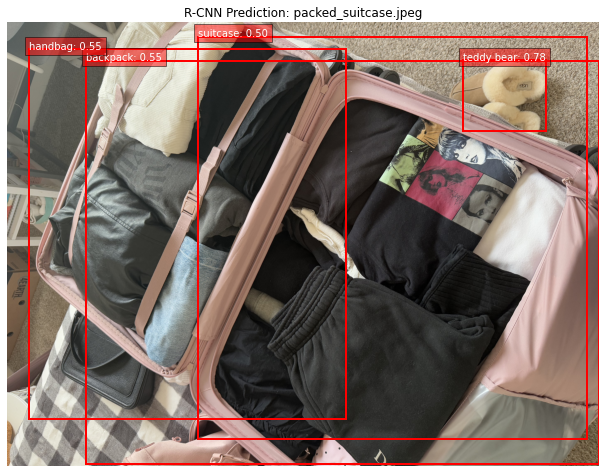

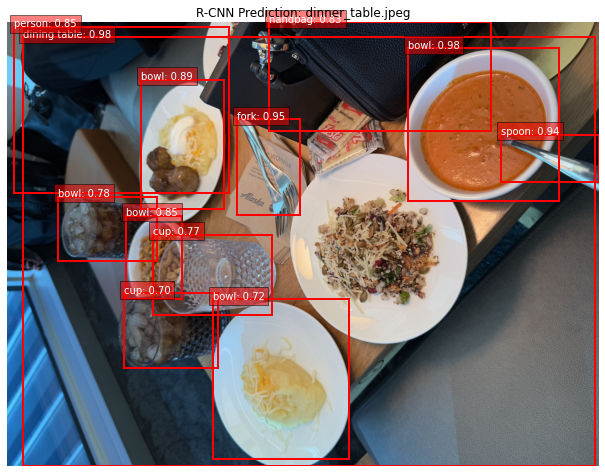

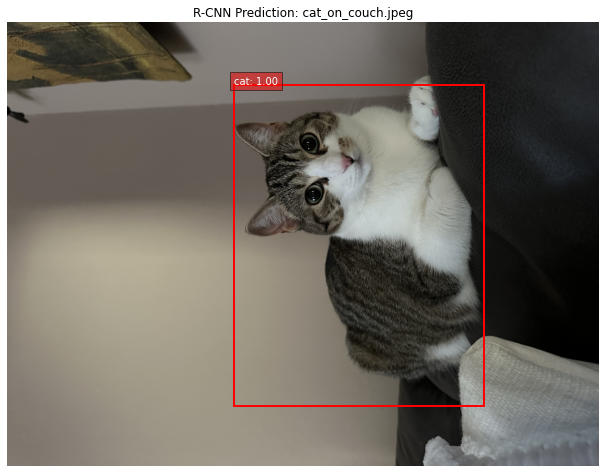

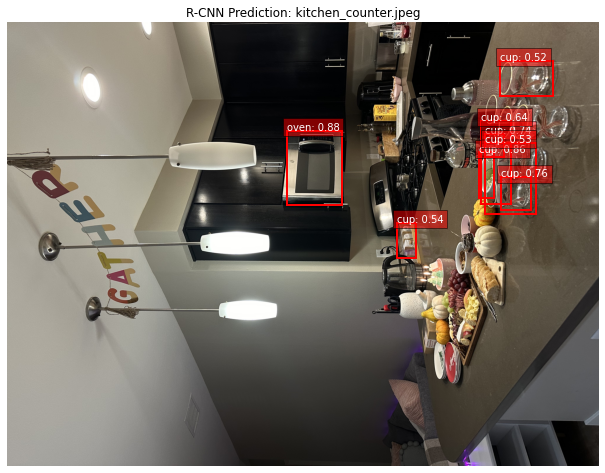

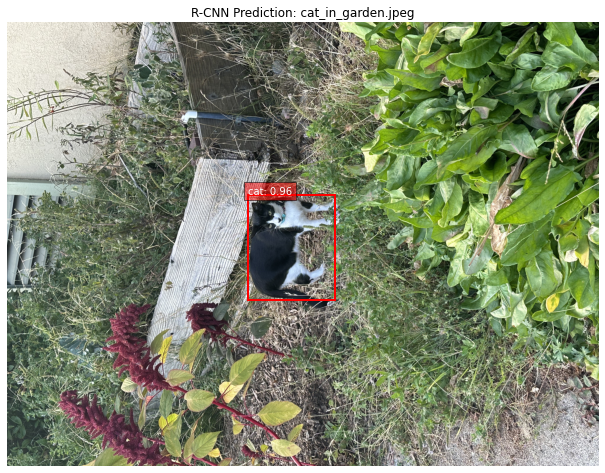

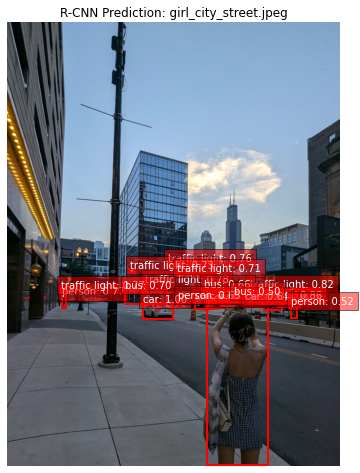

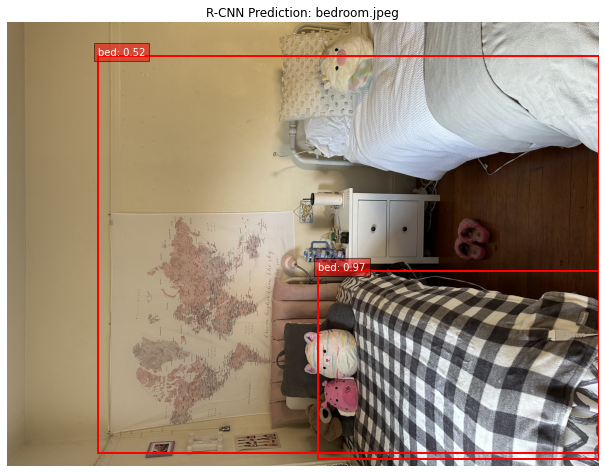

In [ ]:
# Initialize the Faster R-CNN model with the specified weights
model = fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

# Define the threshold and results list
rcnn_results = []
THRESHOLD = 0.5

# Resize transform for Faster R-CNN
resize_transform = Resize((640, 640))

# Process images
for image_name in os.listdir(image_folder):
  image_path = os.path.join(image_folder, image_name)

  if not os.path.isfile(image_path):
    continue  # Skip non-image files
  image = Image.open(image_path)
  image_tensor = F.to_tensor(image)

  # Run model and measure time
  start_time = time.time()
  with torch.no_grad():
    predictions = model([image_tensor])
  end_time = time.time()

  # Extract predictions
  predicted_boxes = predictions[0]['boxes']
  predicted_scores = predictions[0]['scores']
  predicted_labels = predictions[0]['labels']

  # Filter predictions by confidence threshold
  filtered_boxes = []
  filtered_scores = []
  filtered_labels = []

  for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= THRESHOLD:
      filtered_boxes.append(box)
      filtered_scores.append(score.item())
      filtered_labels.append(label.item())

  # Save results
  rcnn_results.append({
    "Image Name": image_name,
    "R-CNN Time": end_time - start_time,
    "R-CNN Objects Detected": len(filtered_boxes),
    "R-CNN Probabilities": filtered_scores
    })

  # Annotate and display image
  fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)
  ax.imshow(image)
  for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label]
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
        )
    ax.add_patch(rect)
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
        )
  plt.axis('off')  # Turn off the axes for better visualization
  plt.title(f"R-CNN Prediction: {image_name}")
  plt.show()

# 2. YOLO

100%|██████████| 49.7M/49.7M [00:00<00:00, 107MB/s] 



image 1/1 /content/drive/MyDrive/MSBA Fall 2024/502 503 Analytics Programming/MSBA 503 Take-Home Assignment/images/packed_suitcase.jpeg: 640x480 1 cat, 1 suitcase, 1 chair, 1 bed, 4011.2ms
Speed: 22.2ms preprocess, 4011.2ms inference, 9.7ms postprocess per image at shape (1, 3, 640, 480)


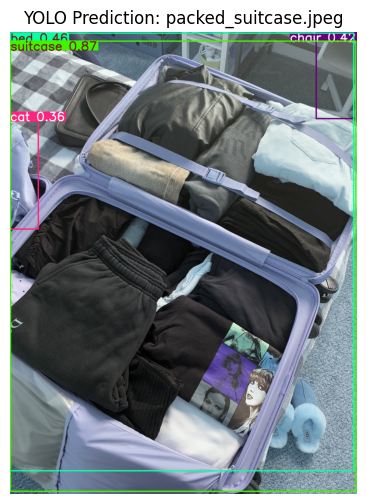


image 1/1 /content/drive/MyDrive/MSBA Fall 2024/502 503 Analytics Programming/MSBA 503 Take-Home Assignment/images/dinner_table.jpeg: 640x480 1 backpack, 1 handbag, 3 cups, 3 forks, 1 spoon, 2 bowls, 1 dining table, 1 laptop, 2446.7ms
Speed: 5.1ms preprocess, 2446.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


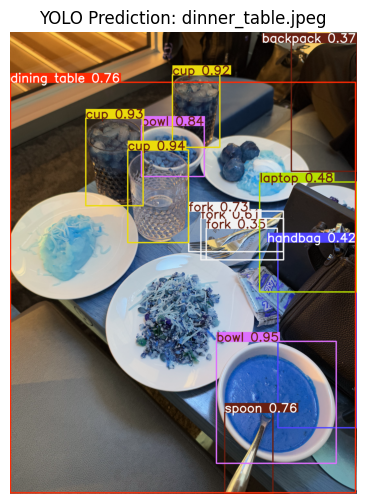


image 1/1 /content/drive/MyDrive/MSBA Fall 2024/502 503 Analytics Programming/MSBA 503 Take-Home Assignment/images/cat_on_couch.jpeg: 640x480 1 cat, 1 couch, 1131.5ms
Speed: 5.4ms preprocess, 1131.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


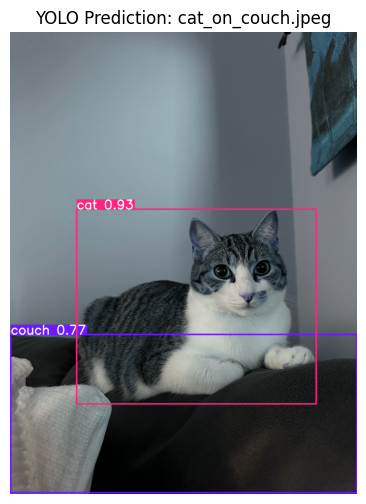


image 1/1 /content/drive/MyDrive/MSBA Fall 2024/502 503 Analytics Programming/MSBA 503 Take-Home Assignment/images/kitchen_counter.jpeg: 640x480 4 bottles, 1 wine glass, 7 cups, 1 knife, 5 bowls, 1 couch, 1 dining table, 1 remote, 1 microwave, 1 oven, 1132.8ms
Speed: 3.9ms preprocess, 1132.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


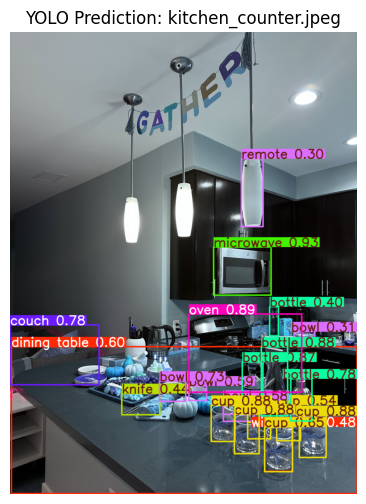


image 1/1 /content/drive/MyDrive/MSBA Fall 2024/502 503 Analytics Programming/MSBA 503 Take-Home Assignment/images/cat_in_garden.jpeg: 640x480 1 dog, 1113.8ms
Speed: 3.7ms preprocess, 1113.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


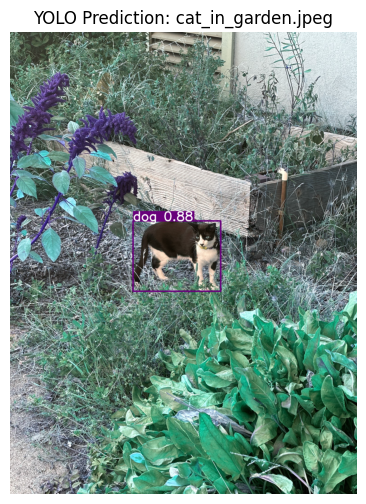


image 1/1 /content/drive/MyDrive/MSBA Fall 2024/502 503 Analytics Programming/MSBA 503 Take-Home Assignment/images/girl_city_street.jpeg: 640x480 2 persons, 6 cars, 1 traffic light, 1 handbag, 1172.0ms
Speed: 5.2ms preprocess, 1172.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


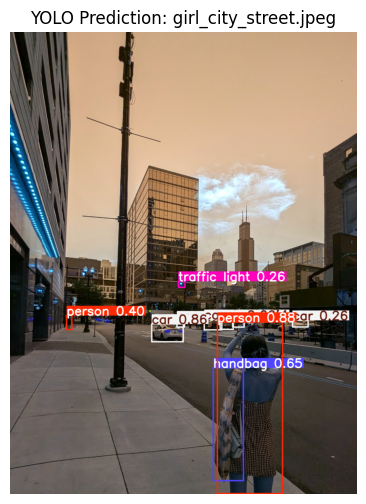


image 1/1 /content/drive/MyDrive/MSBA Fall 2024/502 503 Analytics Programming/MSBA 503 Take-Home Assignment/images/bedroom.jpeg: 640x480 2 beds, 4 teddy bears, 2401.3ms
Speed: 21.3ms preprocess, 2401.3ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 480)


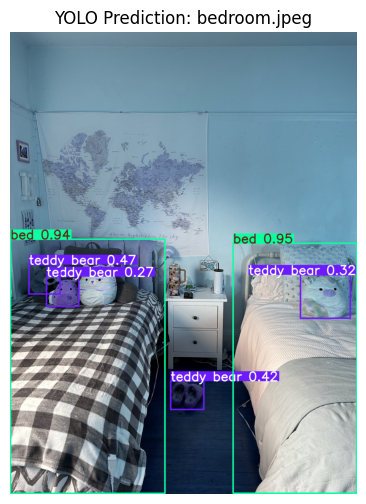

In [ ]:
# Initialize the YOLO model and results list
model = YOLO("yolov8m.pt")
yolo_results = []

# Process images
for image_name in os.listdir(image_folder):
  image_path = os.path.join(image_folder, image_name)

  if not os.path.isfile(image_path):
    continue  # Skip non-image files

  # Run model and measure time
  start_time = time.time()
  results = model.predict(image_path)
  end_time = time.time()

  # Extract predictions
  result = results[0]
  filtered_labels = [model.names[int(cls)] for cls in result.boxes.cls]
  filtered_scores = [conf.item() for conf in result.boxes.conf]
  filtered_boxes = [box.tolist() for box in result.boxes.xyxy]

  # Save results
  yolo_results.append({
      "Image Name": image_name,
      "YOLO Time": end_time - start_time,
      "YOLO Objects Detected": len(filtered_boxes),
      "YOLO Probabilities": filtered_scores
      })

  # Annotate and display image
  annotated_image = result.plot()
  plt.figure(figsize=(10, 6))
  plt.imshow(annotated_image)
  plt.axis('off')  # Turn off the axes for better visualization
  plt.title(f"YOLO Prediction: {image_name}")
  plt.show()

In [ ]:
# Convert results to DataFrame
rcnn_results_df = pd.DataFrame(rcnn_results)
yolo_results_df = pd.DataFrame(yolo_results)

# Merge results for comparison
results_df = pd.merge(rcnn_results_df, yolo_results_df, on="Image Name", how="outer")

# Export results to CSV
results_df.to_csv("object_detection_results.csv", index=False)